### Solution: Open the Hood

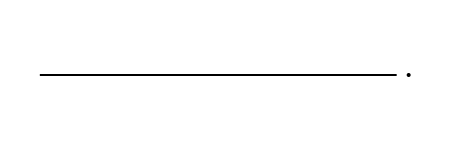

In [1]:
# 1. Use RDKit to read the SMILES string into a `Mol` object
from rdkit import Chem

smi = "C[CH2]"  # SMILES formula for ethyl radical
mol = Chem.MolFromSmiles(smi)  # Interpret SMILES formula
mol # RDKit molecule objects are display-able

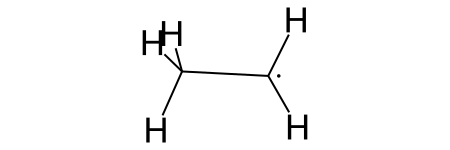

In [2]:
# 2. Add molecular coordinates to the `Mol` object.
from rdkit.Chem import rdDistGeom

mol = Chem.AddHs(mol)   # Add hydrogen atoms (missing in RDKit by default)
rdDistGeom.EmbedMolecule(mol)
mol

In [ ]:
# 3. Determine the atom count, atomic symbols, coordinates, charge, and spin
# from the `Mol` object. Store the coordinates as a NumPy array.
from rdkit.Chem import Descriptors
import numpy

natms = mol.GetNumAtoms()
syms = [a.GetSymbol() for a in mol.GetAtoms()]
conf = mol.GetConformer()
xyzs = numpy.array([conf.GetAtomPosition(i) for i in range(natms)])
char = Chem.GetFormalCharge(mol)
spin = Descriptors.NumRadicalElectrons(mol)

print("Atom count:", natms)
print("Symbols:", syms)
print("Coordinates (in Angstrom):", xyzs)
print("Charge:", char)
print("Spin:", spin)

Atom count: 7
Symbols: ['C', 'C', 'H', 'H', 'H', 'H', 'H']
Coordinates (in Angstrom): [[-6.09524539e-01  8.37564487e-04 -4.72025838e-03]
 [ 8.62682566e-01 -7.50773794e-02 -2.98293507e-01]
 [-1.11600276e+00  4.92871873e-01 -8.73623891e-01]
 [-7.87353080e-01  6.48715336e-01  8.86690753e-01]
 [-1.05433205e+00 -1.00008925e+00  1.76459979e-01]
 [ 1.34032157e+00  8.81130994e-01 -2.72664564e-02]
 [ 1.36420829e+00 -9.48389139e-01  1.40753381e-01]]
Charge: 0
Spin: 1


In [4]:
# 4. Convert the coordinates from Angstroms to Bohr using Pint
from pint import Quantity

conv_factor = Quantity("angstrom").m_as("bohr")  # Conversion factor from Angstroms to Bohr
xyzs_bohr = xyzs * conv_factor
print("Coordinates (in Bohr):", xyzs_bohr)

Coordinates (in Bohr): [[-1.15183444e+00  1.58276749e-03 -8.91999558e-03]
 [ 1.63023378e+00 -1.41875685e-01 -5.63693033e-01]
 [-2.10893957e+00  9.31392854e-01 -1.65090989e+00]
 [-1.48788168e+00  1.22589432e+00  1.67560268e+00]
 [-1.99239882e+00 -1.88989478e+00  3.33461032e-01]
 [ 2.53284069e+00  1.66509626e+00 -5.15261351e-02]
 [ 2.57798004e+00 -1.79219573e+00  2.65985341e-01]]


In [5]:
# 5. Visualize the 3D structure using 3Dmol
import py3Dmol

viewer = py3Dmol.view(width=600, height=450)
viewer.addModel(Chem.MolToXYZBlock(mol), "xyz")
viewer.setStyle({"stick": {}, "sphere": {"scale": 0.3}})
viewer.zoomTo()
viewer.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.